In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

df = pd.read_csv('for_python.csv', index_col = [0])

y = df['Diabetes_binary']
X = df.drop (labels = ['Diabetes_binary'], axis =1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0) 

# Resampling

In [4]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [7]:
print(f'Original dataset shape {Counter(y)}')
print(f'Y train {Counter(y_train)}')
print(f'Y test {Counter(y_test)}')

over= RandomOverSampler(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.5)

X_balanced, y_balanced = over.fit_resample(X_train, y_train)
X_balanced2, y_balanced2 = under.fit_resample(X_balanced, y_balanced)
print(f'Y balanced only over sample {Counter(y_balanced)}')
print(f'Y balanced over and under sampling {Counter(y_balanced2)}')

Original dataset shape Counter({0: 217467, 1: 35025})
Y train Counter({0: 152288, 1: 24456})
Y test Counter({0: 65179, 1: 10569})
Y balanced only over sample Counter({0: 152288, 1: 60915})
Y balanced over and under sampling Counter({0: 121830, 1: 60915})


In [8]:
df_oversampled = pd.concat([X_balanced, y_balanced], axis=1)
df_over_under_sampled = pd.concat([X_balanced2, y_balanced2], axis=1)

df_oversampled.to_csv('df_oversampled.csv', index=False)
df_over_under_sampled.to_csv('df_over_under_sampled.csv', index=False)

# RFE

In [9]:
rfc = RandomForestClassifier()

#balanced_accuracy or accuracy
rfecv = RFECV(estimator=rfc, step=1, cv=5, scoring='accuracy', n_jobs=-1)

rfecv.fit(X_balanced2, y_balanced2)

print("The optimal number of features:", rfecv.n_features_)
print("Best features:", X_balanced2.columns[rfecv.support_])

The optimal number of features: 21
Best features: Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


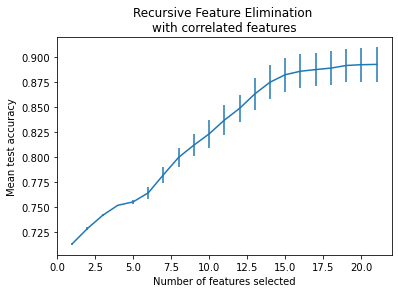

In [11]:
#from Scikit-learn documentation
import matplotlib.pyplot as plt

n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(1, n_scores + 1),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()